# Exploratory Data Analysis of Price Housing project


# Overview

The objective for this project is to create an accurate Sale Price calculation tool for a Real State company, developing in the process a full Data Science Project

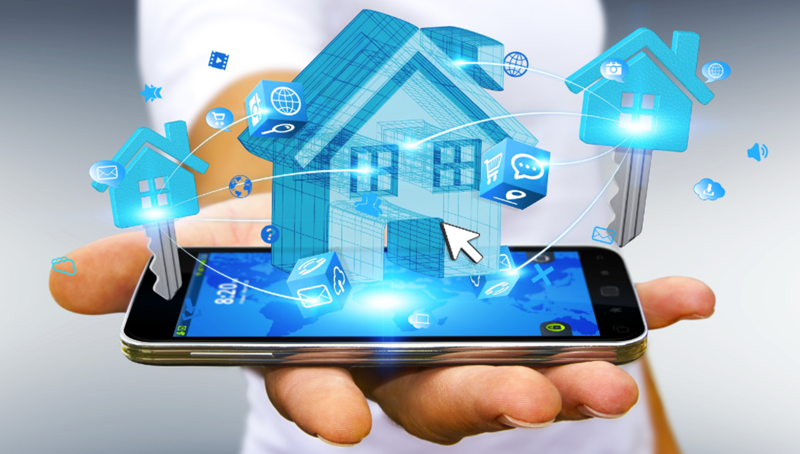


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
#Display max columns
pd.pandas.set_option ("display.max_columns", None)

import pathlib
pathlib.Path.cwd()

path = pathlib.Path.cwd() / 'raw set' / 'raw_data.csv'



dataset = pd.read_csv(path )
#see dataset stadistcs
print(dataset.describe())

dataset



                Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726   
std       1.112799    30.202904     20.645407   181.066207   456.098091   
min       1.000

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0        1          60       RL         65.0     8450   Pave   NaN      Reg   
1        2          20       RL         80.0     9600   Pave   NaN      Reg   
2        3          60       RL         68.0    11250   Pave   NaN      IR1   
3        4          70       RL         60.0     9550   Pave   NaN      IR1   
4        5          60       RL         84.0    14260   Pave   NaN      IR1   
...    ...         ...      ...          ...      ...    ...   ...      ...   
1455  1456          60       RL         62.0     7917   Pave   NaN      Reg   
1456  1457          20       RL         85.0    13175   Pave   NaN      Reg   
1457  1458          70       RL         66.0     9042   Pave   NaN      Reg   
1458  1459          20       RL         68.0     9717   Pave   NaN      Reg   
1459  1460          20       RL         75.0     9937   Pave   NaN      Reg   

     LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0            Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1            Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2            Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3            Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4            Lvl    AllPub       FR2       Gtl      NoRidge       Norm   
...          ...       ...       ...       ...          ...        ...   
1455         Lvl    AllPub    Inside       Gtl      Gilbert       Norm   
1456         Lvl    AllPub    Inside       Gtl       NWAmes       Norm   
1457         Lvl    AllPub    Inside       Gtl      Crawfor       Norm   
1458         Lvl    AllPub    Inside       Gtl        NAmes       Norm   
1459         Lvl    AllPub    Inside       Gtl      Edwards       Norm   

     Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0          Norm     1Fam     2Story            7            5       2003   
1          Norm     1Fam     1Story            6            8       1976   
2          Norm     1Fam     2Story            7            5       2001   
3          Norm     1Fam     2Story            7            5       1915   
4          Norm     1Fam     2Story            8            5       2000   
...         ...      ...        ...          ...          ...        ...   
1455       Norm     1Fam     2Story            6            5       1999   
1456       Norm     1Fam     1Story            6            6       1978   
1457       Norm     1Fam     2Story            7            9       1941   
1458       Norm     1Fam     1Story            5            6       1950   
1459       Norm     1Fam     1Story            5            6       1965   

      YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0             2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1             1976     Gable  CompShg     MetalSd     MetalSd       None   
2             2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3             1970     Gable  CompShg     Wd Sdng     Wd Shng       None   
4             2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   
...            ...       ...      ...         ...         ...        ...   
1455          2000     Gable  CompShg     VinylSd     VinylSd       None   
1456          1988     Gable  CompShg     Plywood     Plywood      Stone   
1457          2006     Gable  CompShg     CemntBd     CmentBd       None   
1458          1996       Hip  CompShg     MetalSd     MetalSd       None   
1459          1965     Gable  CompShg     HdBoard     HdBoard       None   

      MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond  \
0          196.0        Gd        TA      PConc       Gd       TA   
1            0.0        TA        TA     CBlock       Gd       TA   
2          162.0        Gd        TA      PConc       Gd       TA   
3            0.0        TA        TA     BrkTil       TA       Gd   

# Data Analysis 
We will find:

- 1.- Missing values
- 2.- All numerical variables
- 3.- Distribution of numerical variables
- 4.- Categorical variables
- 5.- Cardinatily of categorical variables
- 6.- Outliers
- 7.- Relationships between dependent and independent features

# Missing values %

In [2]:
#Checking the % of NAN in file
features_with_na = [features for features in dataset.columns if dataset[features].isnull().sum()>1]

numerical_features_na = [features for features in features_with_na if dataset[features].dtypes != "O"]
categorical_features_na = [features for features in features_with_na if dataset[features].dtypes == "O"]


#Print missin values numerical val
print("Numerical Missing Features %")
for feature in numerical_features_na:
    print((feature,np.round(dataset[feature].isnull().mean(),4)*100), "% MISSING VALUES")
    
    
print("Categorical Missing Features %")
for feature in categorical_features_na:
    print((feature,np.round(dataset[feature].isnull().mean(),4)*100), "% MISSING VALUES")

Numerical Missing Features %
('LotFrontage', 17.740000000000002) % MISSING VALUES
('MasVnrArea', 0.5499999999999999) % MISSING VALUES
('GarageYrBlt', 5.55) % MISSING VALUES
Categorical Missing Features %
('Alley', 93.77) % MISSING VALUES
('MasVnrType', 0.5499999999999999) % MISSING VALUES
('BsmtQual', 2.53) % MISSING VALUES
('BsmtCond', 2.53) % MISSING VALUES
('BsmtExposure', 2.6) % MISSING VALUES
('BsmtFinType1', 2.53) % MISSING VALUES
('BsmtFinType2', 2.6) % MISSING VALUES
('FireplaceQu', 47.260000000000005) % MISSING VALUES
('GarageType', 5.55) % MISSING VALUES
('GarageFinish', 5.55) % MISSING VALUES
('GarageQual', 5.55) % MISSING VALUES
('GarageCond', 5.55) % MISSING VALUES
('PoolQC', 99.52) % MISSING VALUES
('Fence', 80.75) % MISSING VALUES
('MiscFeature', 96.3) % MISSING VALUES


# Since there are many diferent values, we need to check relationship between missing values and sale price

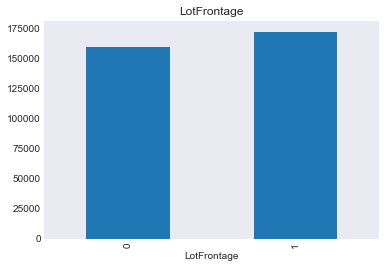

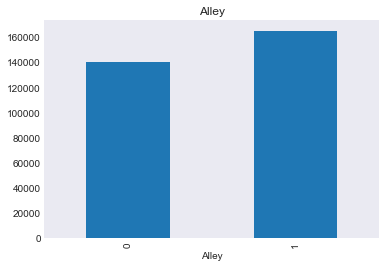

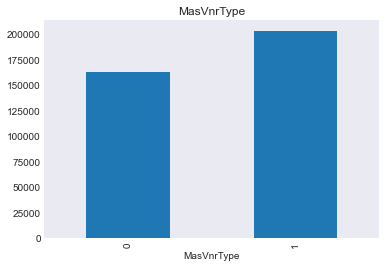

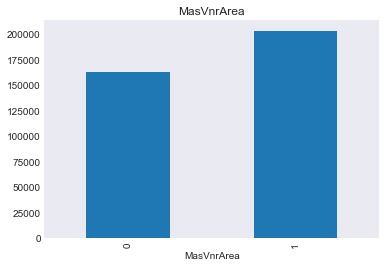

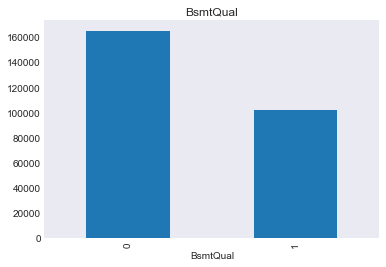

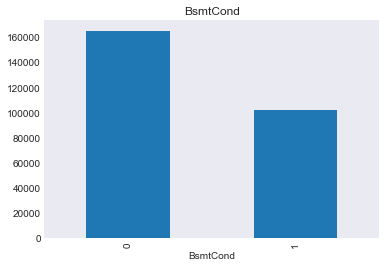

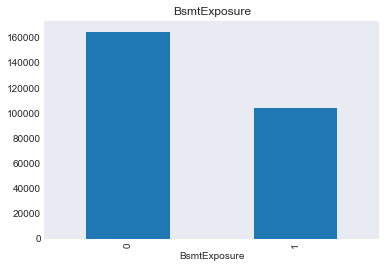

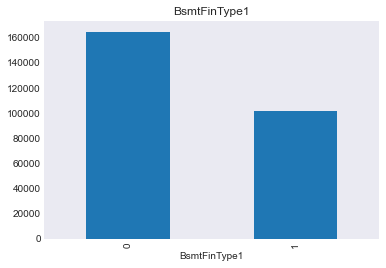

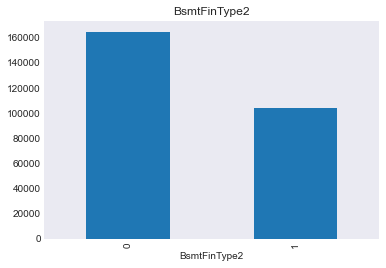

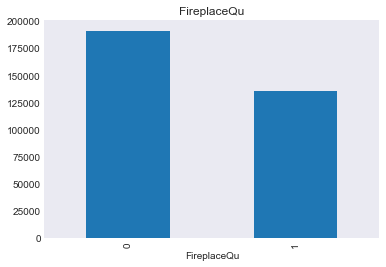

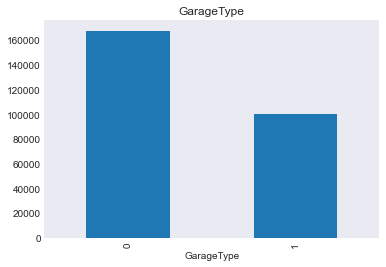

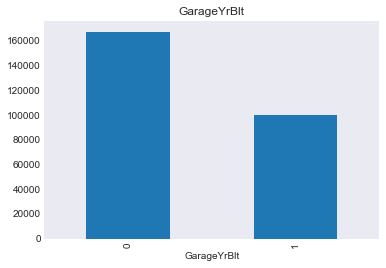

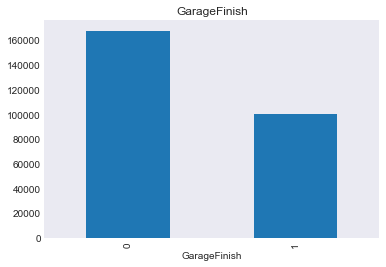

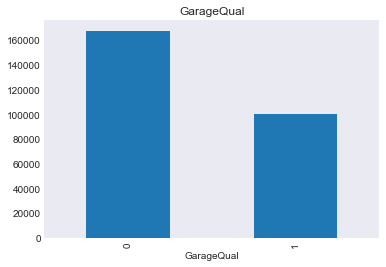

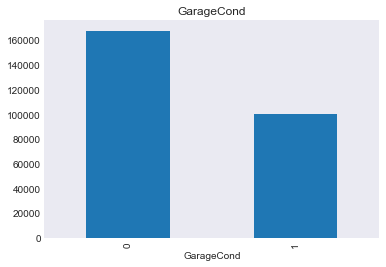

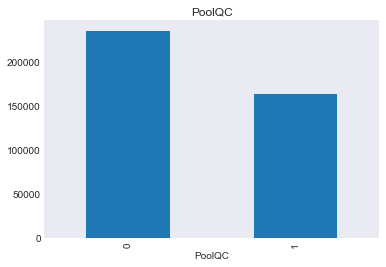

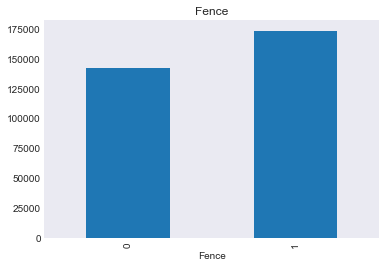

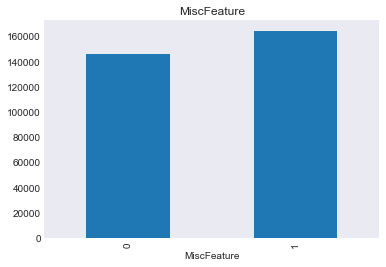

In [3]:
for feature in features_with_na:
    data = dataset.copy()
    
    #VarIAbles that indicates of a value is missing in the row
    data [feature] = np.where(data[feature].isnull(),1,0)
    #ALL FEATURES WITH NAN ARE 1
    
    
    
    #Lets calculate the mean sale price where info is missing
    plt.style.use('seaborn-dark')
    data.groupby(feature)["SalePrice"].median().plot.bar()
    plt.title(feature)
    plt.show()

We can observe that in some variables, the relationship is meaningful, so we will need to replace this NaN with something meaninful in the Feature Engineering 


# Numerical variables

In [4]:
#Checking which features are numerical
numerical_features = [features for features in dataset.columns if dataset[features].dtypes != "O"]

"Visualize numerical variables"
dataset[numerical_features].head()


Id  MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
0   1          60         65.0     8450            7            5       2003   
1   2          20         80.0     9600            6            8       1976   
2   3          60         68.0    11250            7            5       2001   
3   4          70         60.0     9550            7            5       1915   
4   5          60         84.0    14260            8            5       2000   

   YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          2003       196.0         706           0        150          856   
1          1976         0.0         978           0        284         1262   
2          2002       162.0         486           0        434          920   
3          1970         0.0         216           0        540          756   
4          2000       350.0         655           0        490         1145   

   1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  \
0       856       854             0       1710             1             0   
1      1262         0             0       1262             0             1   
2       920       866             0       1786             1             0   
3       961       756             0       1717             1             0   
4      1145      1053             0       2198             1             0   

   FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  Fireplaces  \
0         2         1             3             1             8           0   
1         2         0             3             1             6           1   
2         2         1             3             1             6           1   
3         1         0             3             1             7           1   
4         2         1             4             1             9           1   

   GarageYrBlt  GarageCars  GarageArea  WoodDeckSF  OpenPorchSF  \
0       2003.0           2         548           0           61   
1       1976.0           2         460         298            0   
2       2001.0           2         608           0           42   
3       1998.0           3         642           0           35   
4       2000.0           3         836         192           84   

   EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  MoSold  YrSold  \
0              0          0            0         0        0       2    2008   
1              0          0            0         0        0       5    2007   
2              0          0            0         0        0       9    2008   
3            272          0            0         0        0       2    2006   
4              0          0            0         0        0      12    2008   

   SalePrice  
0     208500  
1     181500  
2     223500  
3     140000  
4     250000

# Temporal variables


YearBuilt [2003 1976 2001 1915 2000 1993 2004 1973 1931 1939 1965 2005 1962 2006
 1960 1929 1970 1967 1958 1930 2002 1968 2007 1951 1957 1927 1920 1966
 1959 1994 1954 1953 1955 1983 1975 1997 1934 1963 1981 1964 1999 1972
 1921 1945 1982 1998 1956 1948 1910 1995 1991 2009 1950 1961 1977 1985
 1979 1885 1919 1990 1969 1935 1988 1971 1952 1936 1923 1924 1984 1926
 1940 1941 1987 1986 2008 1908 1892 1916 1932 1918 1912 1947 1925 1900
 1980 1989 1992 1949 1880 1928 1978 1922 1996 2010 1946 1913 1937 1942
 1938 1974 1893 1914 1906 1890 1898 1904 1882 1875 1911 1917 1872 1905]
YearRemodAdd [2003 1976 2002 1970 2000 1995 2005 1973 1950 1965 2006 1962 2007 1960
 2001 1967 2004 2008 1997 1959 1990 1955 1983 1980 1966 1963 1987 1964
 1972 1996 1998 1989 1953 1956 1968 1981 1992 2009 1982 1961 1993 1999
 1985 1979 1977 1969 1958 1991 1971 1952 1975 2010 1984 1986 1994 1988
 1954 1957 1951 1978 1974]
GarageYrBlt [2003. 1976. 2001. 1998. 2000. 1993. 2004. 1973. 1931. 1939. 1965. 2005.
 1962. 2006.

<AxesSubplot:title={'center':'House Price vs Year Sold'}, xlabel='Year sold', ylabel='Median house price'>

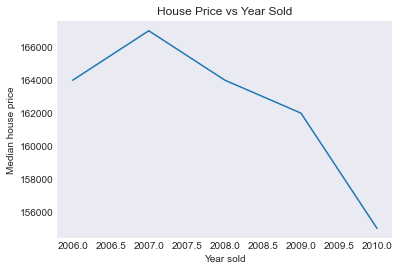

In [5]:
#List of variables containing year
year_features = [ feature for feature in numerical_features if "Yr" in feature or "Year" in feature]


#Print all years
for features in year_features:
    print (features, dataset[features].unique())
    
    
# Analize if there is a relationship between year the house was sold and the price 

a = dataset.groupby("YrSold")["SalePrice"].median().plot()
plt.xlabel("Year sold")
plt.ylabel("Median house price")
plt.title("House Price vs Year Sold")
a


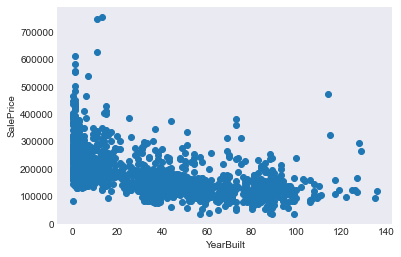

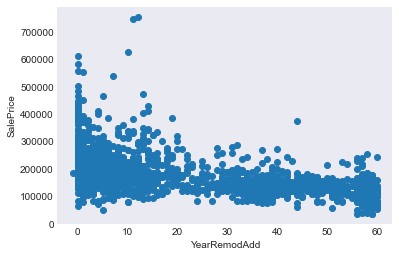

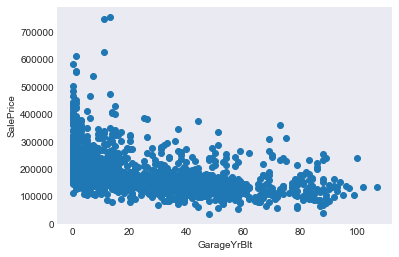

In [6]:
#We will compare the diference between all years feature with Yr Sold
for feature in year_features:
    if feature!= "YrSold":
        data = dataset.copy()
        
        #We will compare the difference between year variables and year sold
        data[feature] = data["YrSold"] - data[feature]
        
        plt.scatter(data[feature], data["SalePrice"])
        plt.xlabel(feature)
        plt.ylabel("SalePrice")
        plt.show()
        
    

# Discrete numerical variables

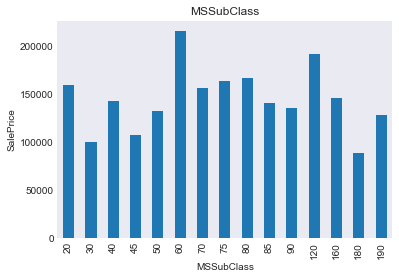

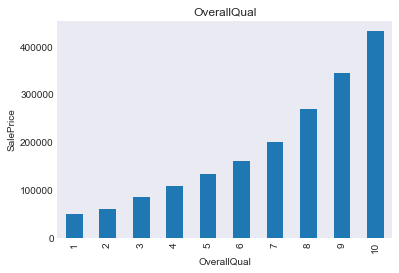

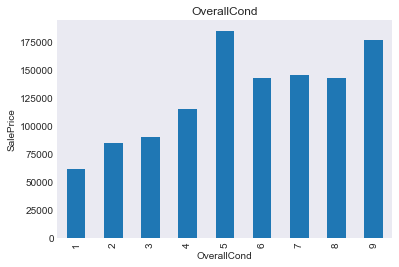

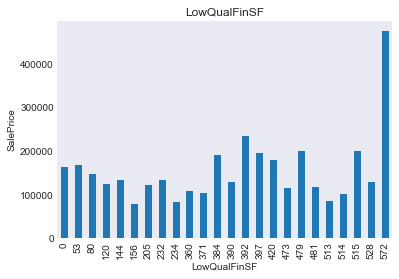

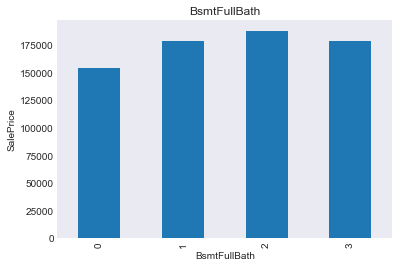

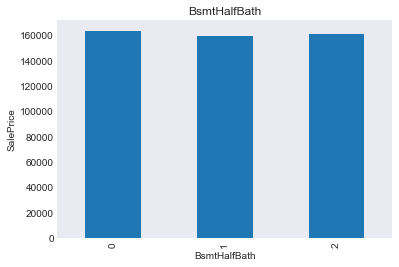

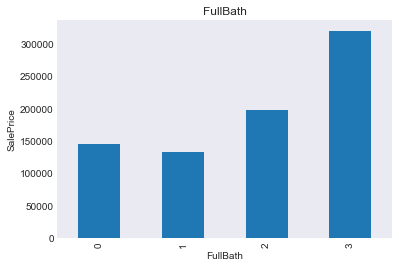

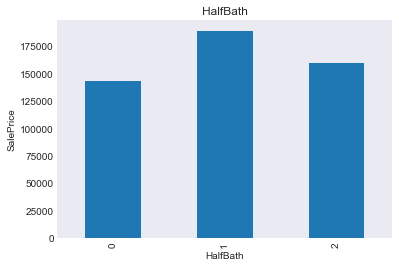

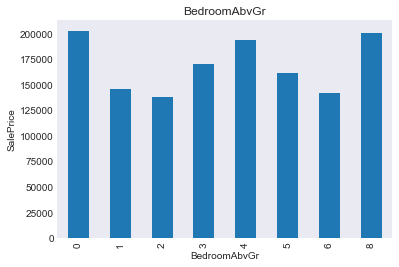

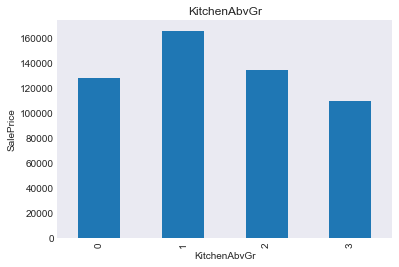

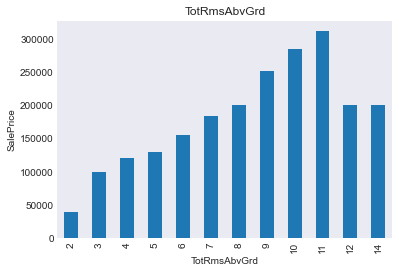

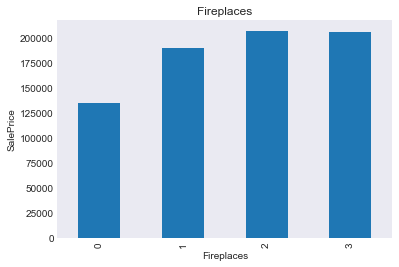

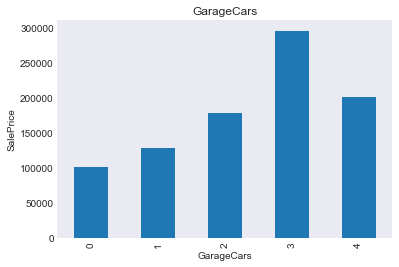

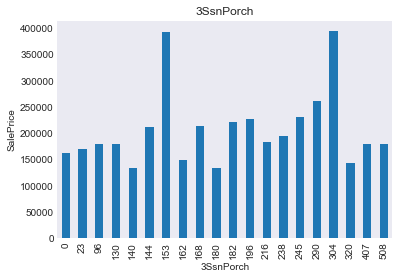

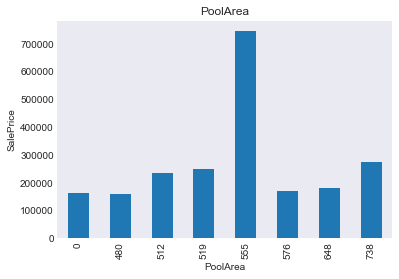

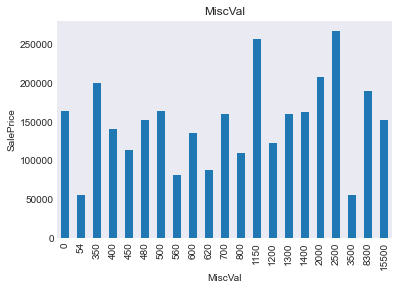

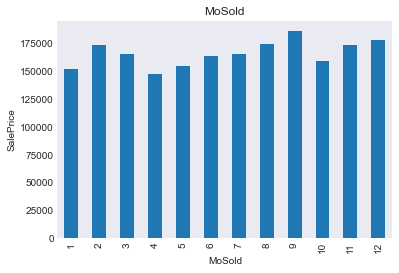

In [7]:
#List of variables containing year
dis_features = [feature for feature in numerical_features if len(dataset[feature].unique())< 25 and feature not in year_features + ["Id"]]
dis_features

#Plot discete features

for feature in dis_features:
    
    data = dataset.copy()
    # Discrete values relationships
    
    data.groupby(feature)["SalePrice"].median().plot.bar()
    
    plt.xlabel(feature)
    plt.ylabel("SalePrice")
    plt.title(feature)
    plt.show()

In [8]:
#Expoential increase is also called monotonic relationship

# Continous variables

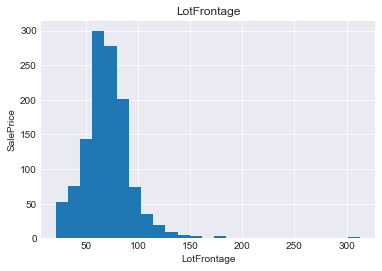

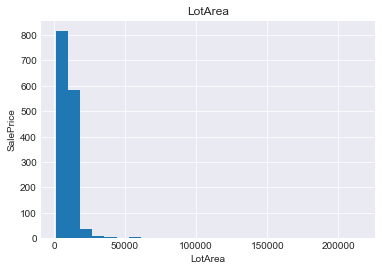

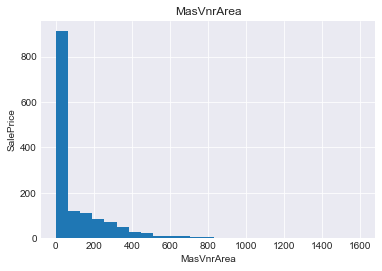

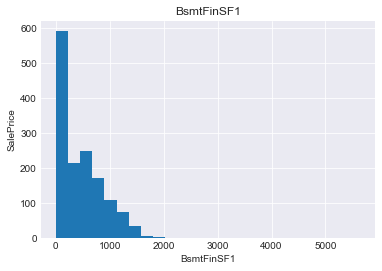

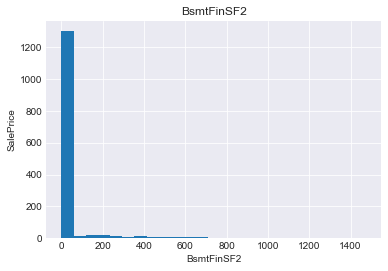

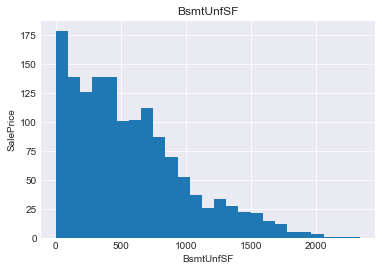

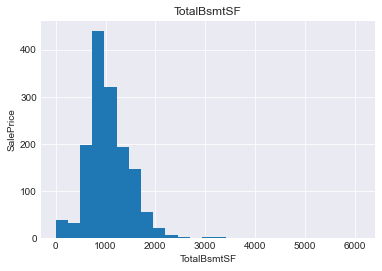

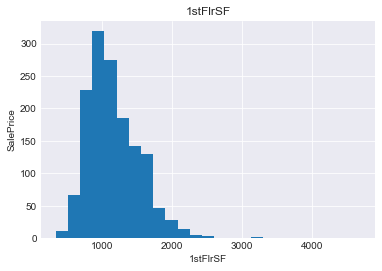

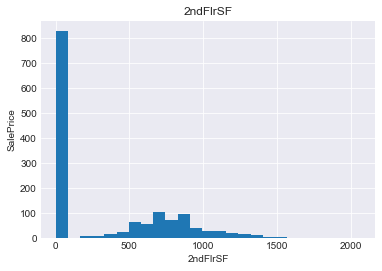

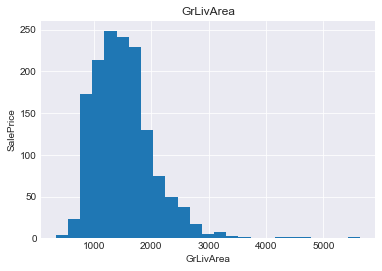

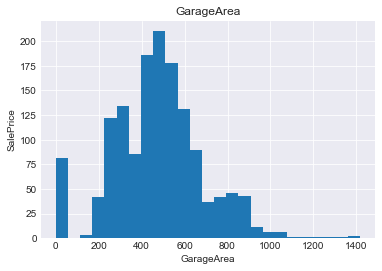

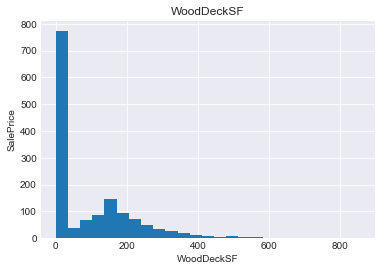

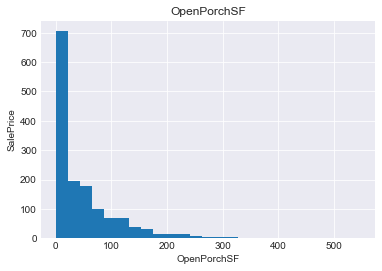

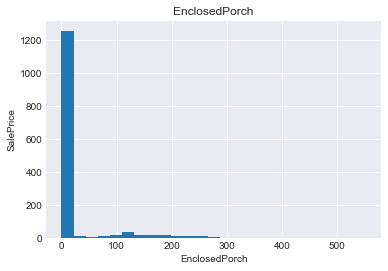

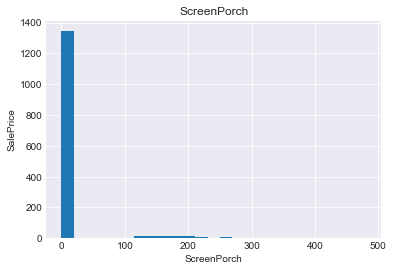

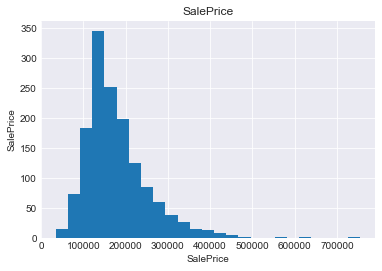

In [9]:
con_features = [feature for feature in numerical_features if len(dataset[feature].unique()) and feature not in dis_features+year_features + ["Id"]]
con_features

#Find dist of continous variables

for feature in con_features:
    
    data = dataset.copy()
        
    #We will compare the difference between year variables and year sold
    plt.style.use('seaborn-dark')
    data[feature].hist(bins=25)
    
    plt.xlabel(feature)
    plt.ylabel("SalePrice")
    plt.title(feature)
    plt.show()



# Advanced EDA
Transform skewed data into normalized data with Log

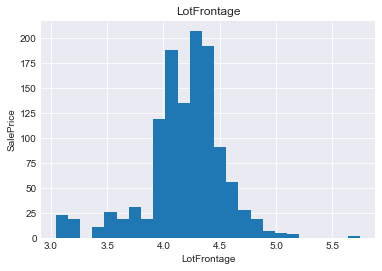

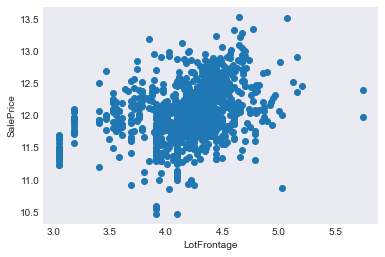

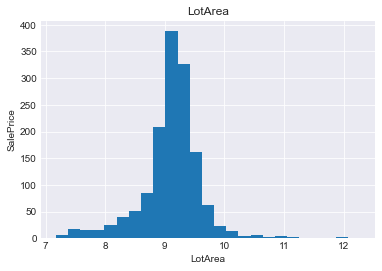

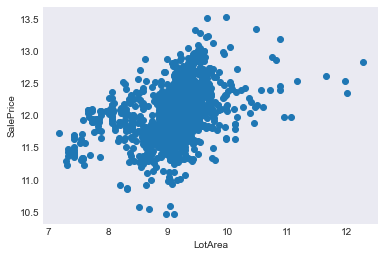

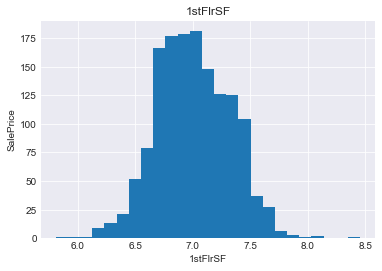

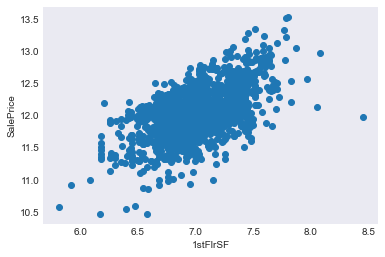

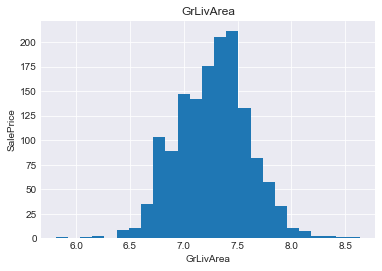

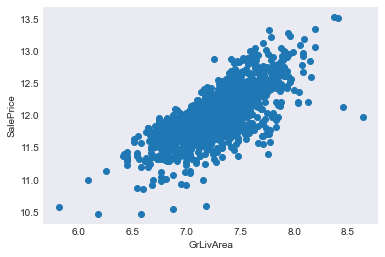

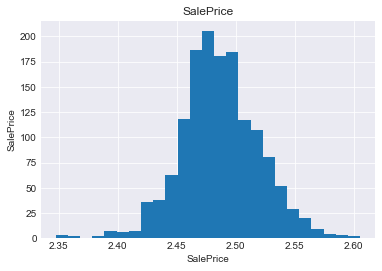

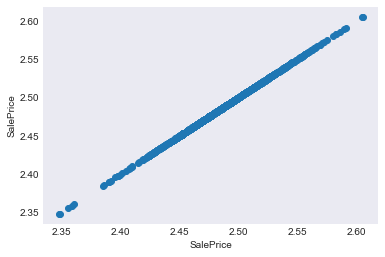

In [10]:

#Logaritmic Tranformation

for feature in con_features:
    data= dataset.copy()
    #Log 0 is not possible
    if 0 in data[feature].unique():
        pass
    else: 
        data[feature]=np.log(data[feature])
        data["SalePrice"]=np.log(data["SalePrice"])
        data[feature].hist(bins=25)
        plt.xlabel(feature)
        plt.ylabel("SalePrice")
        plt.title(feature)
        plt.show()
        
        plt.scatter(data[feature], data["SalePrice"])
        plt.xlabel(feature)
        plt.ylabel("SalePrice")
        plt.show()
        




# Outliers Visualization

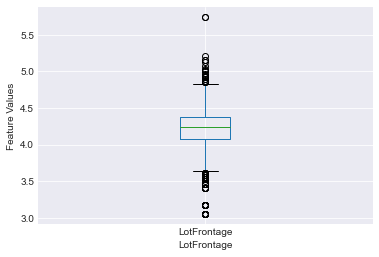

LotFrontage


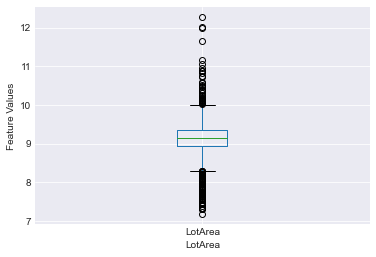

LotArea


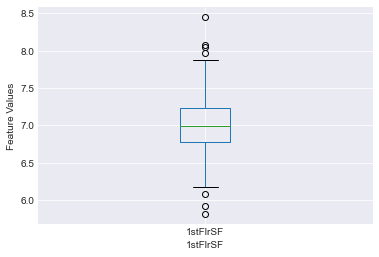

1stFlrSF


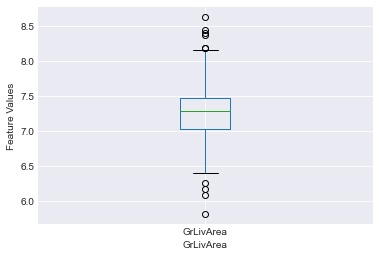

GrLivArea


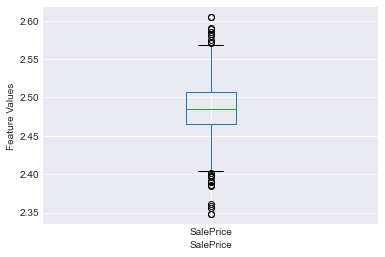

SalePrice


In [11]:
for featurez in con_features:
    data= dataset.copy()
    
    
    if 0 in data[featurez].unique():
        pass
    else: 
        data[featurez]=np.log(data[featurez])
        data["SalePrice"]=np.log(data["SalePrice"])
        data.boxplot(column = featurez)
        plt.xlabel(featurez)
        plt.ylabel("Feature Values")
        plt.show()
        print(featurez)
        
#o

# Categorical variables

the feature is MSZoning and number of categories are 5


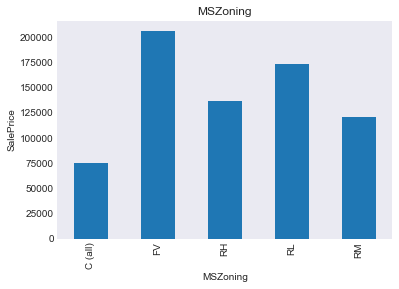

the feature is Street and number of categories are 2


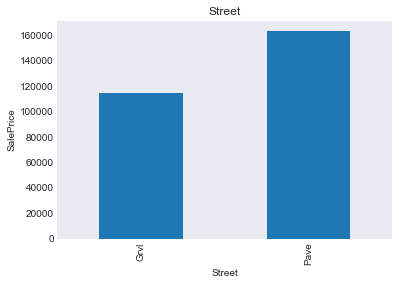

the feature is Alley and number of categories are 3


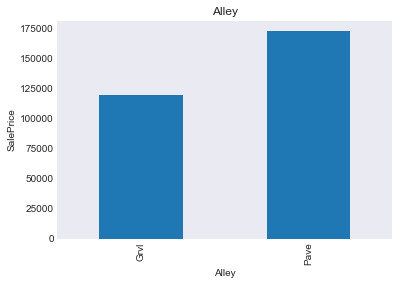

the feature is LotShape and number of categories are 4


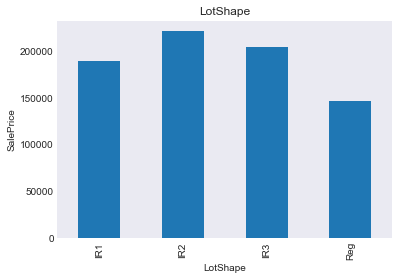

the feature is LandContour and number of categories are 4


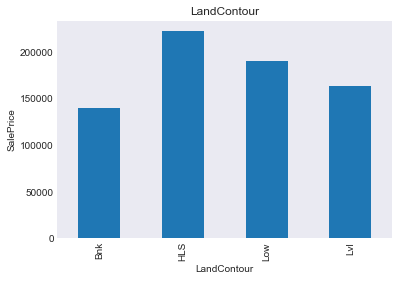

the feature is Utilities and number of categories are 2


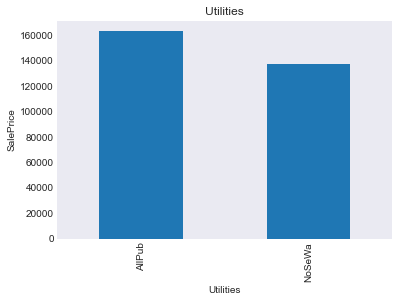

the feature is LotConfig and number of categories are 5


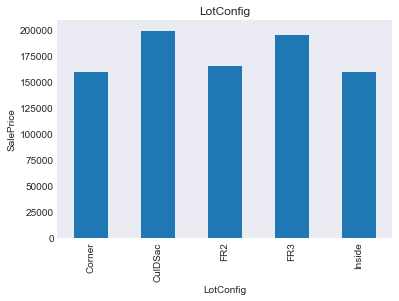

the feature is LandSlope and number of categories are 3


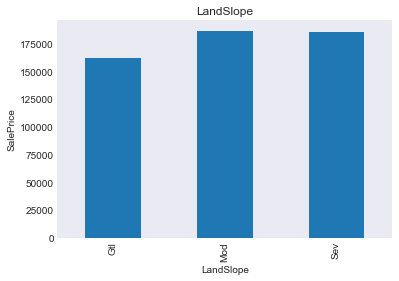

the feature is Neighborhood and number of categories are 25


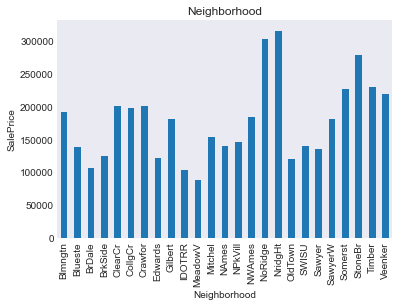

the feature is Condition1 and number of categories are 9


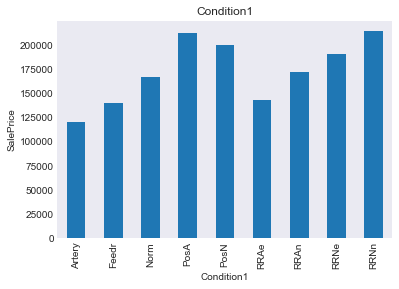

the feature is Condition2 and number of categories are 8


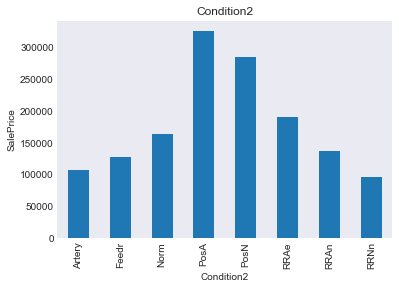

the feature is BldgType and number of categories are 5


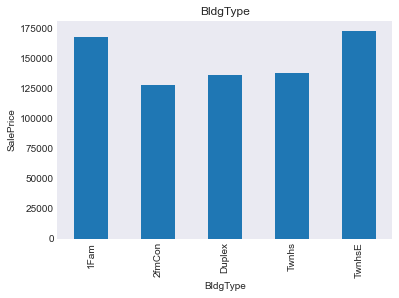

the feature is HouseStyle and number of categories are 8


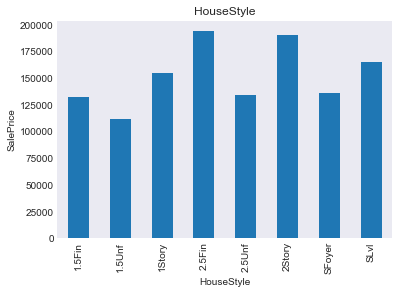

the feature is RoofStyle and number of categories are 6


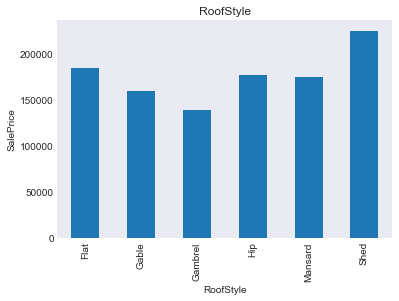

the feature is RoofMatl and number of categories are 8


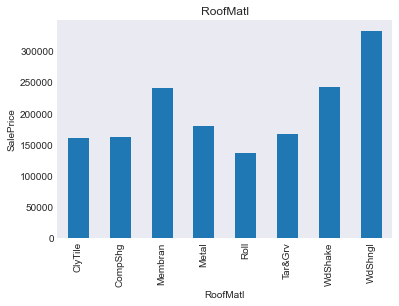

the feature is Exterior1st and number of categories are 15


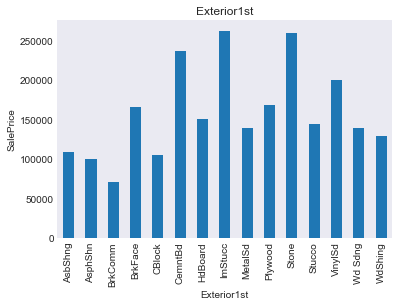

the feature is Exterior2nd and number of categories are 16


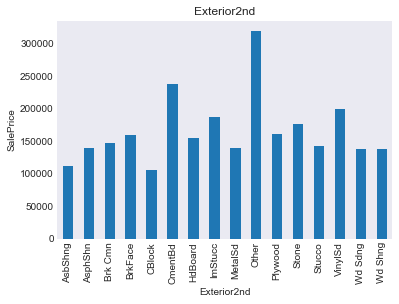

the feature is MasVnrType and number of categories are 5


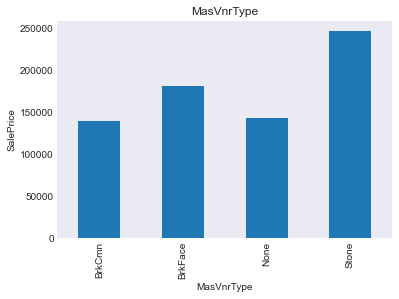

the feature is ExterQual and number of categories are 4


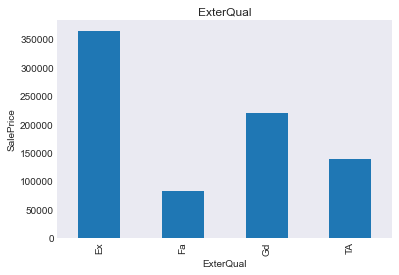

the feature is ExterCond and number of categories are 5


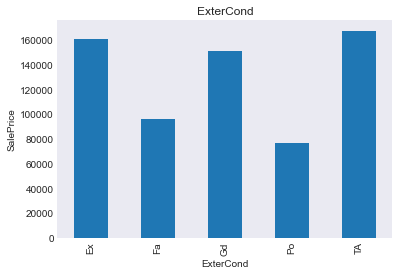

the feature is Foundation and number of categories are 6


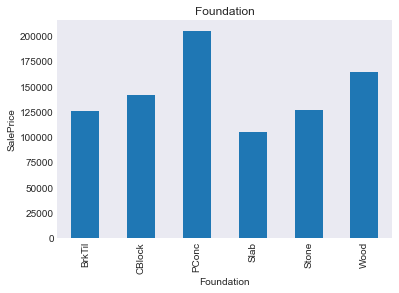

the feature is BsmtQual and number of categories are 5


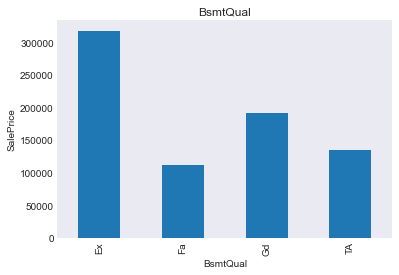

the feature is BsmtCond and number of categories are 5


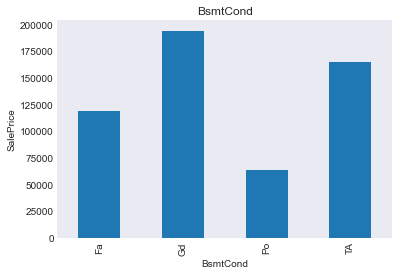

the feature is BsmtExposure and number of categories are 5


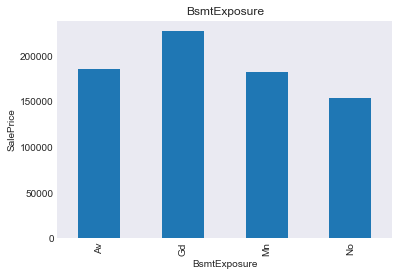

the feature is BsmtFinType1 and number of categories are 7


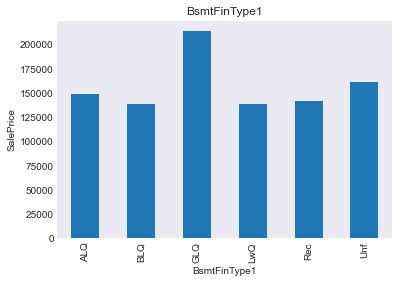

the feature is BsmtFinType2 and number of categories are 7


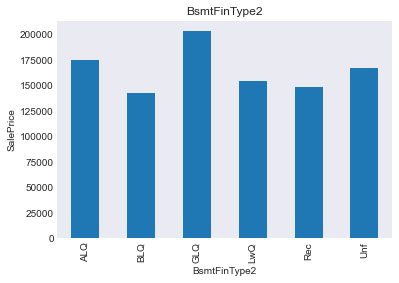

the feature is Heating and number of categories are 6


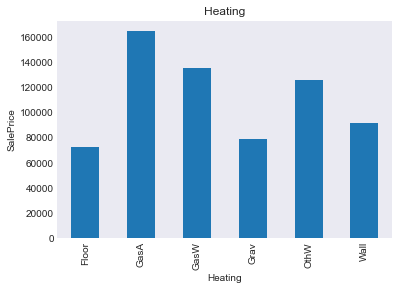

the feature is HeatingQC and number of categories are 5


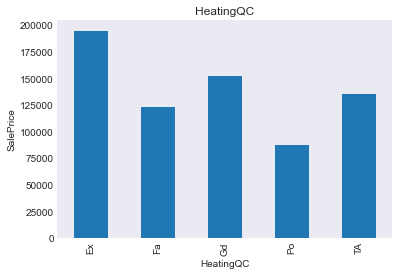

the feature is CentralAir and number of categories are 2


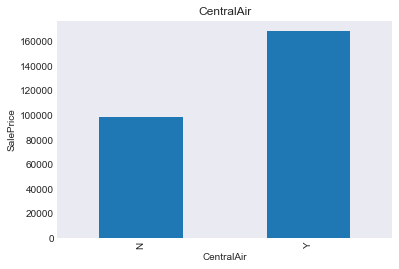

the feature is Electrical and number of categories are 6


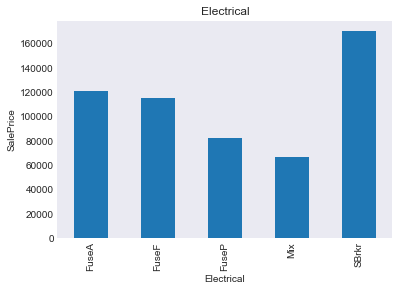

the feature is KitchenQual and number of categories are 4


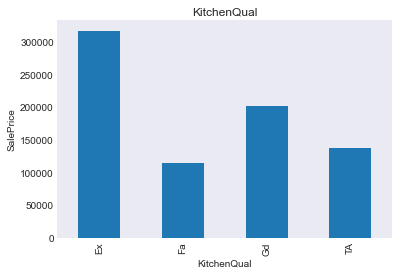

the feature is Functional and number of categories are 7


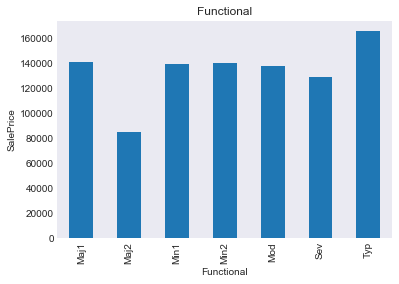

the feature is FireplaceQu and number of categories are 6


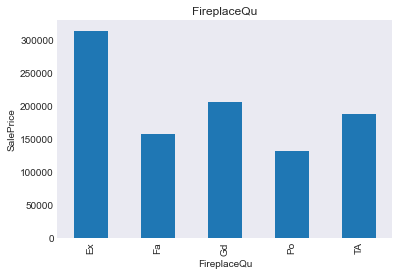

the feature is GarageType and number of categories are 7


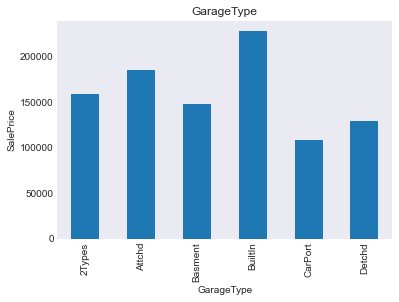

the feature is GarageFinish and number of categories are 4


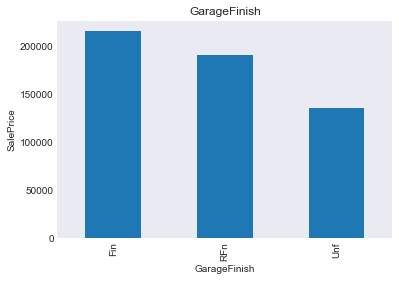

the feature is GarageQual and number of categories are 6


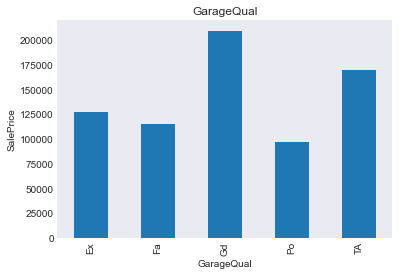

the feature is GarageCond and number of categories are 6


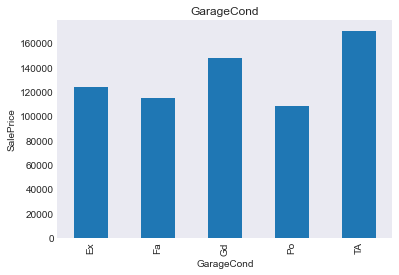

the feature is PavedDrive and number of categories are 3


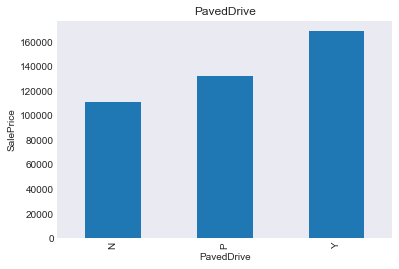

the feature is PoolQC and number of categories are 4


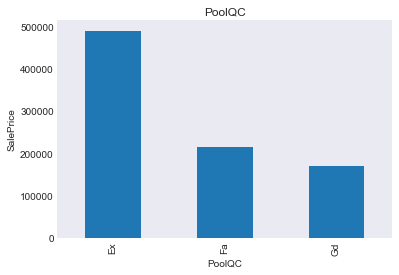

the feature is Fence and number of categories are 5


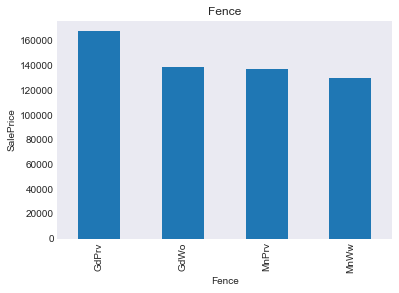

the feature is MiscFeature and number of categories are 5


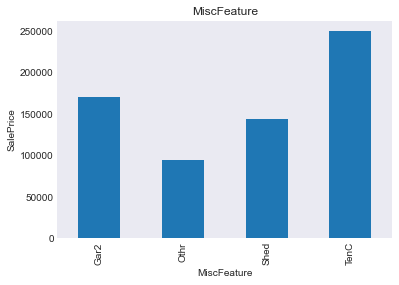

the feature is SaleType and number of categories are 9


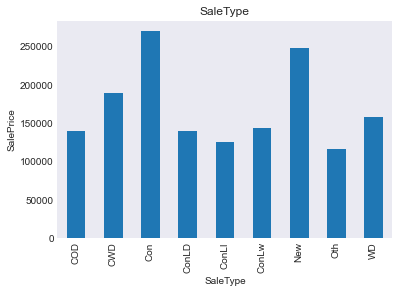

the feature is SaleCondition and number of categories are 6


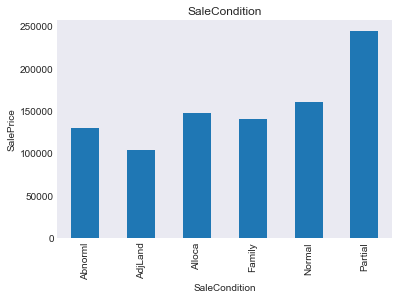

In [12]:
cat_features = [features for features in dataset.columns if dataset[features].dtypes == "O"]
cat_features


#Find how much categories are in each categoric feature
for features in cat_features:
    print("the feature is {} and number of categories are {}" .format (features,len(dataset[features].unique())))
    data = dataset.copy()
        
    #We will compare the difference between year variables and year sold
    
    data.groupby(features)["SalePrice"].median().plot.bar()
    
    plt.xlabel(features)
    plt.ylabel("SalePrice")
    plt.title(features)
    plt.show()

# EDA conclusions:

- NaN should not be dropped since they represent in some variables a great factor vs Saleprice
- Year substraction (YrSold - Yrfeatures) creates new and more representative features than original features
- Log normalization is needed in skewed distributed features
- Categorical features enconding should be made, since this set contains a large number of labels, One Hot encoding could create a lot of columns, in this case a ordinal label encoder is recomended to avoid a very large number of features
- There is a large number of variables so we should do feature selection to discard noisy and non relevant features